# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

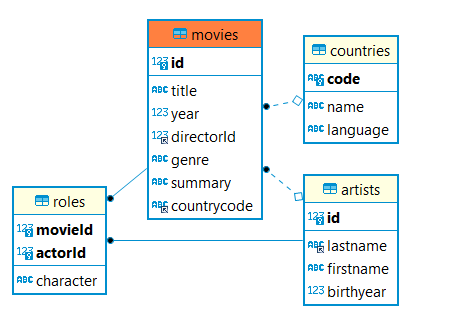

In [1]:
from IPython.display import Image
Image("snaps\ER_diagram.png")

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [2]:
import os
import pandas as pd

In [3]:
from sqlalchemy import create_engine
import pymysql

In [4]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw') 
host = os.environ.get('movies3_host')  
port = 3306
dbname = 'movies'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

### Exemples

#### Tables de base

In [5]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

,id,title,year,directorId,genre,summary,countrycode
0,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US
2,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
3,33,Impitoyable,1992,190,Western,"Après avoir été un impitoyable tueur, toujours...",US
4,38,Eternal Sunshine of the Spotless Mind,2004,201,Science-Fiction,Joël et Clémentine ne voient plus que les mauv...,US


In [6]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

,id,lastname,firstname,birthyear
0,1,Lucas,George,1944
1,2,Hamill,Mark,1951
2,3,Ford,Harrison,1942
3,4,Fisher,Carrie,1956
4,5,Cushing,Peter,1913


In [7]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

,movieId,actorId,character
0,11,2,Luke Skywalker
1,1891,2,Luke Skywalker
2,1892,2,Luke Skywalker
3,181808,2,Luke Skywalker / Dobbu Scay (voice)
4,11,3,Han Solo


In [8]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

,code,name,language
0,AU,Australia,
1,BE,Belgium,
2,BS,Bahamas,
3,CA,Canada,
4,CN,China,


#### Autre requête simple
Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [9]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

,id,lastname,firstname,birthyear
0,131,Gyllenhaal,Jake,1980
1,205,Dunst,Kirsten,1982
2,225,Holmes,Ashton,1978
3,258,García Bernal,Gael,1978
4,368,Witherspoon,Reese,1976


In [10]:
results.shape

(118, 4)

In [11]:
len(results)

118

### Questions

Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [12]:
movies = pd.read_sql_query("SELECT * FROM movies", engine)


In [13]:
sql_query_01 = """
    SELECT *
    FROM movies
    WHERE genre = 'Drame'
"""

results = pd.read_sql_query(sql_query_01, engine)
results.head()


,id,title,year,directorId,genre,summary,countrycode
0,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
1,59,A History of Violence,2005,224,Drame,"Tom Stall, un père de famille à la vie paisibl...",US
2,116,Match point,2005,1243,Drame,Jeune professeur de tennis issu d'un milieu mo...,US
3,142,Le Secret de Brokeback Mountain,2005,1614,Drame,"Eté 1963, Wyoming.Deux jeunes cow-boys, Jack e...",CA
4,145,Breaking the Waves,1996,42,Drame,Au début des années soixante-dix sur la côte n...,DK


In [14]:
nombre_films_drama = len(results)
nombre_film = len(movies)
print(f'Les films de type drame represente: {round(100*nombre_films_drama/nombre_film)}% du films')

Les films de type drame represente: 36% du films


Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [15]:
sql_query_02 = """
    SELECT title, `character`,year, firstname, lastname
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE lastname = 'Willis'
    ORDER BY year;

"""

results = pd.read_sql_query(sql_query_02, engine)
results.head()


,title,character,year,firstname,lastname
0,Piège de cristal,John McClane,1988,Bruce,Willis
1,58 minutes pour vivre,John McClane,1990,Bruce,Willis
2,Pulp Fiction,Butch Coolidge,1994,Bruce,Willis
3,Une Journée en enfer,John McClane,1995,Bruce,Willis
4,Die Hard 4 : Retour en enfer,John McClane,2007,Bruce,Willis


Q03: Qui est le réalisateur de Memento ?

In [16]:
sql_query_03 = """
    SELECT firstname, lastname, title
    FROM movies
        INNER JOIN artists
        ON movies.directorid = artists.id
    WHERE title = 'Memento'
"""

results = pd.read_sql_query(sql_query_03, engine)
results.head()

,firstname,lastname,title
0,Christopher,Nolan,Memento


Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [17]:
sql_query_04 = """
    SELECT title, firstname, lastname, `character` 
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE `character` = 'Chewbacca'
"""

results = pd.read_sql_query(sql_query_04, engine)
results.head()

,title,firstname,lastname,character
0,La Guerre des étoiles,Peter,Mayhew,Chewbacca
1,L'Empire contre-attaque,Peter,Mayhew,Chewbacca
2,Le Retour du Jedi,Peter,Mayhew,Chewbacca
3,Star Wars : Le Réveil de la Force,Peter,Mayhew,Chewbacca
4,Star Wars : Les Derniers Jedi,Joonas,Suotamo,Chewbacca


Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [18]:
sql_query_05 = """
    SELECT title, firstname, lastname, `character` 
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE `character` = 'John McClane'
"""

results = pd.read_sql_query(sql_query_05, engine)
results.head()

,title,firstname,lastname,character
0,Piège de cristal,Bruce,Willis,John McClane
1,Die Hard 4 : Retour en enfer,Bruce,Willis,John McClane
2,Une Journée en enfer,Bruce,Willis,John McClane
3,58 minutes pour vivre,Bruce,Willis,John McClane


Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [19]:
sql_query_06 = """
    SELECT lastname, firstname
    FROM roles
    INNER JOIN artists
        ON roles.actorid = artists.id
    INNER JOIN movies
        ON roles.movieid=movies.id
    WHERE title = 'Sueurs froides'
"""

results = pd.read_sql_query(sql_query_06, engine)
results.head()

,lastname,firstname
0,Stewart,James
1,Novak,Kim
2,Bel Geddes,Barbara


Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Jonnhy Depp ?

In [20]:
sql_query_07 = """
SELECT title AS Titre
FROM (
SELECT artists.id AS Artiste, title, movies.id AS Idfilm
FROM artists
INNER JOIN movies ON artists.id = movies.directorId
WHERE lastname = "Burton"
) AS filmburton
INNER JOIN roles ON filmburton.Idfilm = roles.movieId 
INNER JOIN artists ON roles.actorId = artists.id
WHERE lastname = "Depp"
"""

results = pd.read_sql_query(sql_query_07, engine)
results.head()

,Titre
0,"Sleepy Hollow, La Légende du cavalier sans tête"


Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [21]:
sql_query_08 = """
    SELECT title, firstname, lastname, `character` 
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE firstname='Woody' and lastname='Allen'
    
"""

results = pd.read_sql_query(sql_query_08, engine)
results.head()

,title,firstname,lastname,character
0,Scoop,Woody,Allen,Sid Waterman
1,Manhattan,Woody,Allen,Isaac Davis
2,Annie Hall,Woody,Allen,Alvy Singer
3,Maris et femmes,Woody,Allen,Prof. Gabriel 'Gabe' Roth


Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [22]:
sql_query_09 = """
    SELECT title, firstname, lastname, `character` 
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE directorid=actorid
    
"""

results = pd.read_sql_query(sql_query_09, engine)
results.head()

,title,firstname,lastname,character
0,Impitoyable,Clint,Eastwood,Bill Munny
1,Reservoir Dogs,Quentin,Tarantino,Mr. Brown
2,Scoop,Woody,Allen,Sid Waterman
3,Pulp Fiction,Quentin,Tarantino,Jimmie Dimmick
4,Manhattan,Woody,Allen,Isaac Davis


In [23]:
len(results)

17

Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué 

In [24]:
sql_query_10 = """
    SELECT title
    FROM movies
    INNER JOIN artists ON movies.directorid=artists.id
    WHERE lastname="Tarantino" and directorid NOT IN 
    ( SELECT actorid
    FROM roles
    WHERE movies.id=roles.movieid
       )
 """

results = pd.read_sql_query(sql_query_10, engine)
results.head()

,title
0,Kill Bill : Volume 1
1,Jackie Brown
2,Kill Bill : Volume 2
3,Inglourious Basterds
4,Django Unchained


Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.

In [25]:
sql_query_11 = """
    SELECT title, firstname, lastname, `character` 
    FROM movies
    INNER JOIN artists ON movies.directorid = artists.Id
    INNER JOIN roles ON movies.id = roles.movieid
    WHERE directorid=actorid
    
"""

results = pd.read_sql_query(sql_query_11, engine)
results.head()

,title,firstname,lastname,character
0,Impitoyable,Clint,Eastwood,Bill Munny
1,Reservoir Dogs,Quentin,Tarantino,Mr. Brown
2,Scoop,Woody,Allen,Sid Waterman
3,Pulp Fiction,Quentin,Tarantino,Jimmie Dimmick
4,Manhattan,Woody,Allen,Isaac Davis


Q12: Quels sont les films de Hitchcock sans James Stewart

In [26]:
sql_query_12 = """
    SELECT title, firstname, lastname
    FROM artists
    INNER JOIN roles ON roles.actorid=artists.id
    INNER JOIN movies ON roles.movieid=movies.id
    WHERE  lastname='Hitchcock' and  lastname!='Stewart'
    
"""

results = pd.read_sql_query(sql_query_12, engine)
results.head()

,title,firstname,lastname
0,L'Inconnu du Nord-Express,Patricia,Hitchcock


Q13: Quel est la filmographie de James Stewart ?

In [27]:
sql_query_13 = """
    SELECT title, firstname, lastname
    FROM artists
    INNER JOIN roles ON roles.actorid=artists.id
    INNER JOIN movies ON roles.movieid=movies.id
    WHERE firstname='James' and lastname='Stewart'
    
"""

results = pd.read_sql_query(sql_query_13, engine)
results.head()

,title,firstname,lastname
0,Sueurs froides,James,Stewart
1,Fenêtre sur cour,James,Stewart
2,L'homme qui en savait trop,James,Stewart


Q14: Quels sont les films sans rôle (acteurs) ?

In [28]:
sql_query_14 = """
   SELECT id ,title, movieId 
   FROM movies 
   LEFT JOIN roles ON movies.id =roles.movieId 
   WHERE movieId IS NULL
  """
 
results = pd.read_sql_query(sql_query_14, engine)
results.head()

,id,title,movieId
0,74,La Guerre des Mondes,None


Q15: Combien d'acteurs n’ont jamais réalisé de film ? 

In [29]:
sql_query_15 = """
    SELECT COUNT(artists.id)
    FROM artists
    LEFT JOIN movies ON movies.directorid=artists.id
    WHERE movies.id IS NULL
"""

results = pd.read_sql_query(sql_query_15, engine)
results.head()

,COUNT(artists.id)
0,987


Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

In [30]:
sql_query_16 = """
    SELECT firstname, lastname, COUNT(title) as numbre_filme
    FROM movies
    INNER JOIN artists
        ON movies.directorid = artists.id
    GROUP BY lastname
    ORDER BY numbre_filme DESC
"""

results = pd.read_sql_query(sql_query_16, engine)
results.head(10)

,firstname,lastname,numbre_filme
0,Steven,Spielberg,13
1,Alfred,Hitchcock,10
2,Woody,Allen,8
3,Quentin,Tarantino,7
4,Stanley,Kubrick,7
5,Francis,Ford Coppola,6
6,Christopher,Nolan,6
7,Ridley,Scott,6
8,Roman,Polanski,6
9,George,Lucas,5


Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

In [31]:
sql_query_17 = """
    SELECT firstname, lastname, COUNT(title) as numbre_filme
    FROM movies
    INNER JOIN artists
        ON movies.directorid = artists.id
    GROUP BY lastname
    HAVING numbre_filme>=2
    
"""

results = pd.read_sql_query(sql_query_17, engine)

results.head(10)

,firstname,lastname,numbre_filme
0,George,Lucas,5
1,Quentin,Tarantino,7
2,Francis,Ford Coppola,6
3,Michel,Gondry,2
4,David,Cronenberg,4
5,Stanley,Kubrick,7
6,Steven,Spielberg,13
7,Christopher,Nolan,6
8,Ridley,Scott,6
9,Martin,Scorsese,3


In [32]:
print(f'le nombre de realisateur qui sont realises plus de 2 films: {len(results)}')

le nombre de realisateur qui sont realises plus de 2 films: 47


Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

In [33]:
sql_query_18 = """
    SELECT m.title,a1.firstname as prenom_acteur, a1.lastname as nom_acteur, a2.lastname as nom_Realisateur, a2.firstname as prénom_réalisateur
    FROM roles r 
    INNER JOIN artists a1 on r.actorId =a1.id 
    INNER JOIN movies m on r.movieId = m.id 
    INNER JOIN artists a2 on m.directorId=a2.id
    WHERE a2.firstname =a1.firstname and  r.actorId!=a2.id
    

    
"""

results = pd.read_sql_query(sql_query_18, engine)
results.head()

,title,prenom_acteur,nom_acteur,nom_Realisateur,prénom_réalisateur
0,Volte/Face,John,Travolta,Woo,John
1,La Grande Illusion,Jean,Gabin,Renoir,Jean
2,Les demoiselles de Rochefort,Jacques,Perrin,Demy,Jacques
3,Les demoiselles de Rochefort,Jacques,Riberolles,Demy,Jacques
4,Broken Arrow,John,Travolta,Woo,John


Q19: Quels sont les 10 pays produisant le plus de films ?

In [34]:
sql_query_19 = """
    SELECT name, COUNT(countrycode) as numbre_films
    FROM movies
    INNER JOIN countries
        ON movies.countrycode = countries.code
    GROUP BY countrycode
    ORDER BY numbre_films DESC
    
"""

results = pd.read_sql_query(sql_query_19, engine)
results.head(10)

,name,numbre_films
0,Etats-Unis,131
1,France,39
2,Royaume-Uni,21
3,Canada,6
4,Allemagne,5
5,Italie,5
6,Japan,4
7,Australia,3
8,Suède,3
9,Belgium,2


Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

In [35]:
sql_query_20 = """
    SELECT actorid, firstname, lastname, COUNT(title) as numbre_films
    FROM roles
    INNER JOIN movies ON roles.movieid = movies.id
    INNER JOIN artists ON roles.actorid = artists.id   
    WHERE countrycode='FR'
    GROUP BY actorid
    ORDER BY numbre_films DESC
    
"""

results = pd.read_sql_query(sql_query_20, engine)
results.head()

,actorid,firstname,lastname,numbre_films
0,3784,Michel,Piccoli,3
1,3829,Jean-Paul,Belmondo,3
2,50,Catherine,Deneuve,3
3,11546,Pierre,Fresnay,2
4,17498,Niels,Arestrup,2


---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)